In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tabulate import tabulate # se debe pegar el siguiente comando en la terminal antes de ejecutar <pip install tabulate>

Para estimar el número total de carpetas de investigación de 2020 se utilizaron modelos polinomiales de grado uno, dos y tres, así como splines cúbicos. El proceso se realizó considerando dos agrupaciones de datos: 1) los datos desagregados por mes desde enero de 2016 hasta mayo de 2020; y, 2) la suma por año de 2016 a 2019.

# Estimaciones anuales

### Descarga de datos

In [28]:
ls

Aprox_carpetas.png                          datos_estimacion_anual.csv
Bases_de_datos_modificadas_violencia.ipynb  denuncias_al_anio.csv
Denuncias_por_alcaldia.csv                  denuncias_mensuales.csv
Promedio_denuncias_alcaldia.csv             viol_numero_denuncias_ok.csv
README.md


In [29]:
cd Bases_de_datos

[Errno 2] No such file or directory: 'Bases_de_datos'
/home/jovyan/midirectorio/Bases_de_datos


In [30]:
ls

Aprox_carpetas.png                          datos_estimacion_anual.csv
Bases_de_datos_modificadas_violencia.ipynb  denuncias_al_anio.csv
Denuncias_por_alcaldia.csv                  denuncias_mensuales.csv
Promedio_denuncias_alcaldia.csv             viol_numero_denuncias_ok.csv
README.md


In [31]:
violencia_a = pd.read_csv("denuncias_al_anio.csv")

In [32]:
violencia_a

,Unnamed: 0,anio,denuncias_anio
0,0,2016,18558
1,1,2017,18435
2,2,2018,19933
3,3,2019,25776
4,4,2020,10674


### Manipulación de datos

In [37]:
v = np.array(violencia_a.drop([4]))

In [38]:
y = v[:,2]

In [39]:
y

array([18558, 18435, 19933, 25776])

In [40]:
x = v[:,1]

In [41]:
x

array([2016, 2017, 2018, 2019])

### Modelos polinomilaes de grado 1, 2 y 3

In [42]:
coefficients1 = np.polyfit(x,y,1)

In [43]:
coefficients2 = np.polyfit(x,y,2)

In [44]:
coefficients3 = np.polyfit(x,y,3)

### Splines cúbicos 

In [45]:
splines = interp1d(x,y,kind = 'cubic')
nevals = 10000
xevals = np.linspace(min(x),max(x),nevals)
yevals = splines(xevals)

### Evaluación de los datos

In [46]:
y_pol_1 = np.polyval(coefficients1, x)
y_pol_2 = np.polyval(coefficients2, x)
y_pol_3 = np.polyval(coefficients3, x)
y_spl = splines(x)

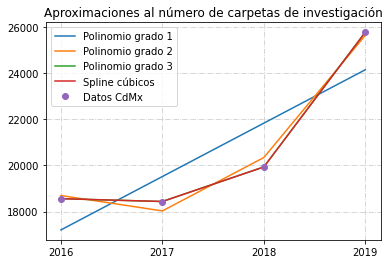

In [47]:
plt.plot(x, y_pol_1,
         x, y_pol_2,
         x, y_pol_3,
         x, y_spl, 
         x, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.title("Aproximaciones al número de carpetas de investigación")
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.locator_params(axis = 'x', nbins = 4)
plt.grid(True)
plt.savefig('Aprox_carpetas.png')
plt.show()